In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
##Dataset: https://www.kaggle.com/datasets/adeelsherazi/car-price-analysis

In [122]:
#CSV Imports

#Andrew's Import
cars = pd.read_csv(r'C:\Users\andre\Downloads\Car Prices\automobile.csv')

In [123]:
cars.shape

(201, 26)

In [124]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [125]:
cars.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [126]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [127]:
#Assign columns that are continuous and categorical 
con = cars.select_dtypes(include=['float64','int64']).columns
cat = cars.select_dtypes(include=['object']).columns

In [128]:
#View the categorical variables and their cardinality 
for col in list(cat):
    print(col)
    print(cars[col].value_counts())
    print('\n')

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64


fuel-type
gas       181
diesel     20
Name: fuel-type, dtype: int64


aspiration
std      165
turbo     36
Name: aspiration, dtype: int64


num-of-doors
four    113
two      86
Name: num-of-doors, dtype: int64


body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


drive-wheels
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64


engine-location
front    198
rear       3
Name: engine-location, dtype: int64


engine-type
ohc      

In [ ]:
# Plan for pre-processing the data

# - Manipulate any of the categorical variables? 
# - Decide what columns to keep. Do this by visualizing and looking at correlation
# - Figure out what to do with the null values
# - Clean/alter the data to assure each feature is in the format we want it to be in

In [129]:
#Group normalized losses by make and replace NA's with the mean of each group 
cars['normalized-losses'] = cars['normalized-losses'].fillna(
    cars.groupby('make')['normalized-losses'].transform('mean'))

In [130]:
cars[cars['normalized-losses'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
42,0,NaN,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785
43,2,NaN,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90.0,5000.0,24,29,11048
72,1,NaN,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175.0,5000.0,19,24,16503
126,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


In [131]:
#Fill remaining NA's with mean grouped by body-style
cars['normalized-losses'] = cars['normalized-losses'].fillna(
    cars.groupby('body-style')['normalized-losses'].transform('mean'))

In [132]:
#Group bore by make and replace NA's with the mean of each group 
cars['bore'] = cars['bore'].fillna(
    cars.groupby('make')['bore'].transform('mean'))

In [133]:
#Group stroke by make and replace NA's with the mean of each group 
cars['stroke'] = cars['stroke'].fillna(
    cars.groupby('make')['stroke'].transform('mean'))

In [134]:
#Group horsepower by make and replace NA's with the mean of each group 
cars['horsepower'] = cars['horsepower'].fillna(
    cars.groupby('body-style')['horsepower'].transform('mean'))

In [135]:
#Group peak-rpm by make and replace NA's with the mean of each group 
cars['peak-rpm'] = cars['peak-rpm'].fillna(
    cars.groupby('body-style')['peak-rpm'].transform('mean'))

In [136]:
#Remove NA values for number of doors
cars = cars.dropna()

In [137]:
cars.shape

(199, 26)

In [138]:
cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [139]:
#Change number of doors and number of cylinders to continuous values

cars['num-of-doors'] = cars['num-of-doors'].replace(['two'], 2)
cars['num-of-doors'] = cars['num-of-doors'].replace(['four'], 4)

cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['four'], 4)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['six'], 6)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['five'], 5)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['two'], 2)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['eight'], 8)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['three'], 3)
cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['twelve'], 12)

In [140]:
#Re-assign columns that are continuous and categorical 
con = cars.select_dtypes(include=['float64','int64']).columns
cat = cars.select_dtypes(include=['object']).columns

In [141]:
cat

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

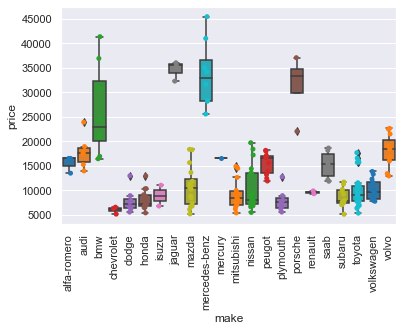

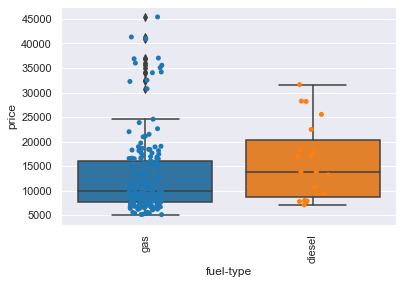

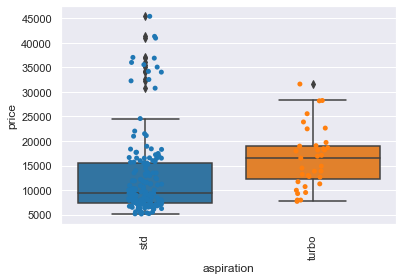

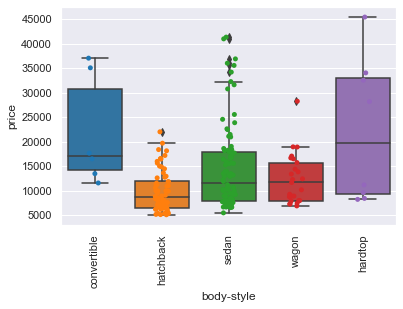

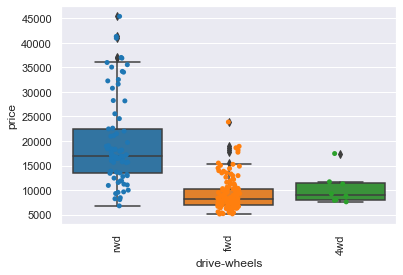

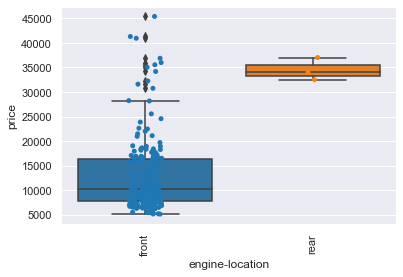

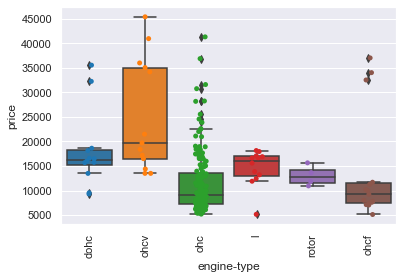

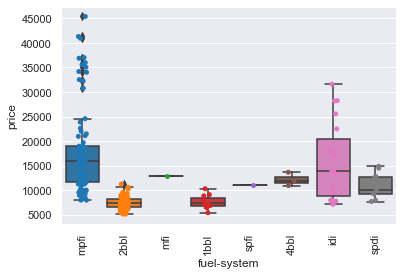

In [145]:
#Visualizing categorical data
for column in list(cat):
    sns.set_theme(style="darkgrid")
    ax = sns.stripplot(x=column, y='price', data=cars, palette = "tab10")
    ax = sns.boxplot(x=column, y='price', data=cars, palette = "tab10")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

In [146]:
con

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

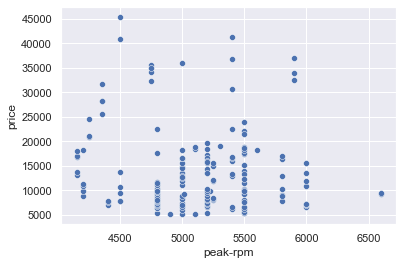

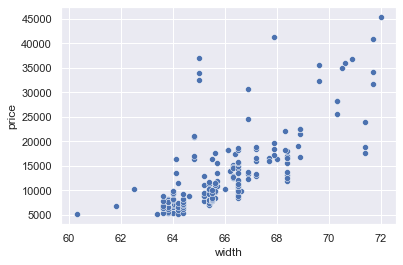

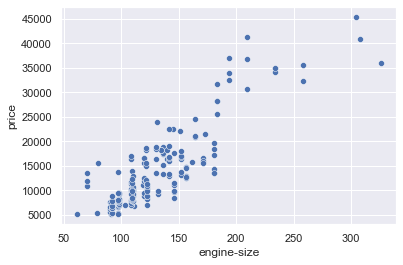

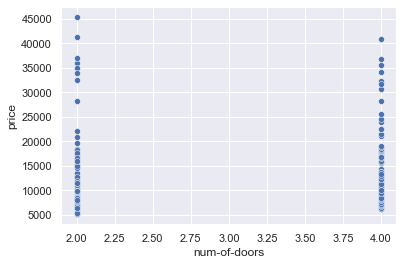

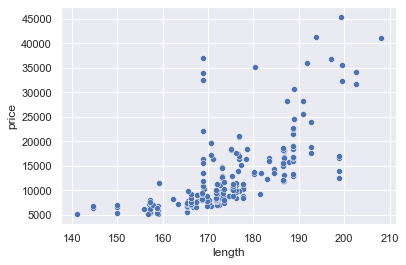

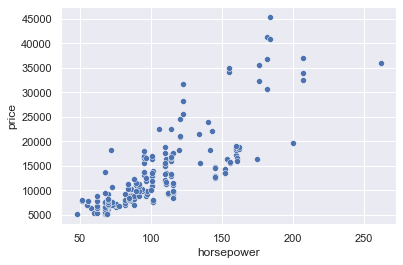

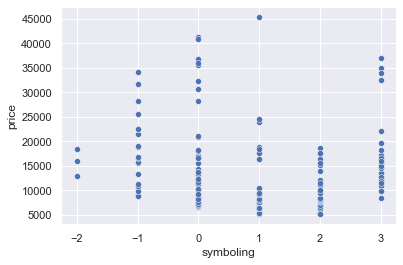

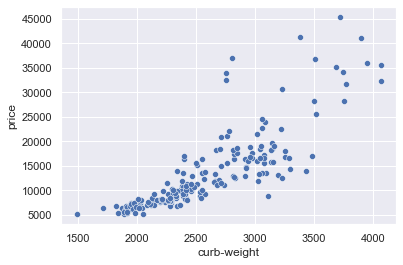

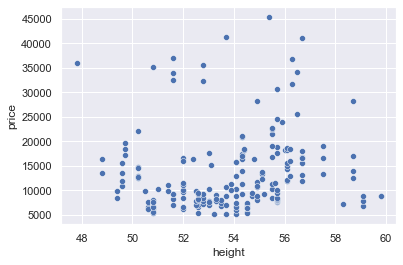

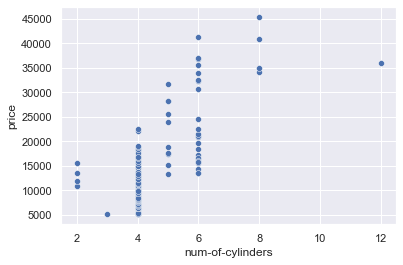

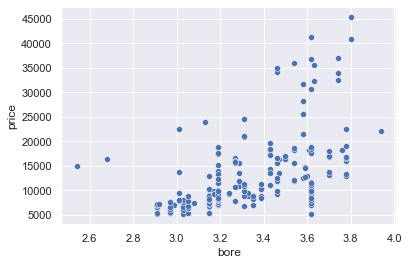

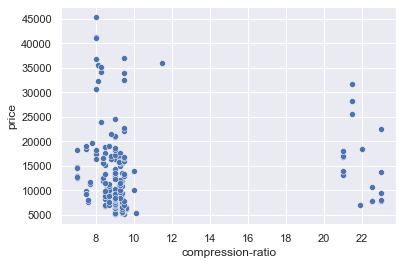

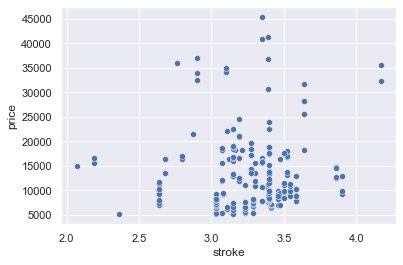

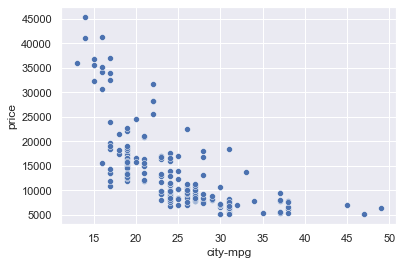

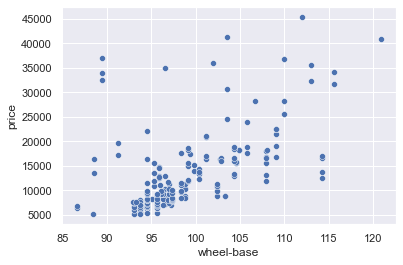

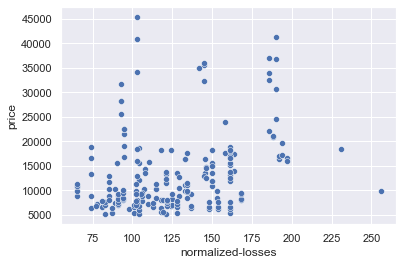

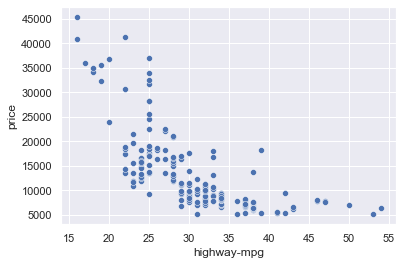

In [32]:
#visualizing continuous data
for column in list(set(con)-set(['price'])): 
    sns.set_theme(style="darkgrid")
    sc = sns.scatterplot(x=column, y='price', data=cars)
    plt.show()

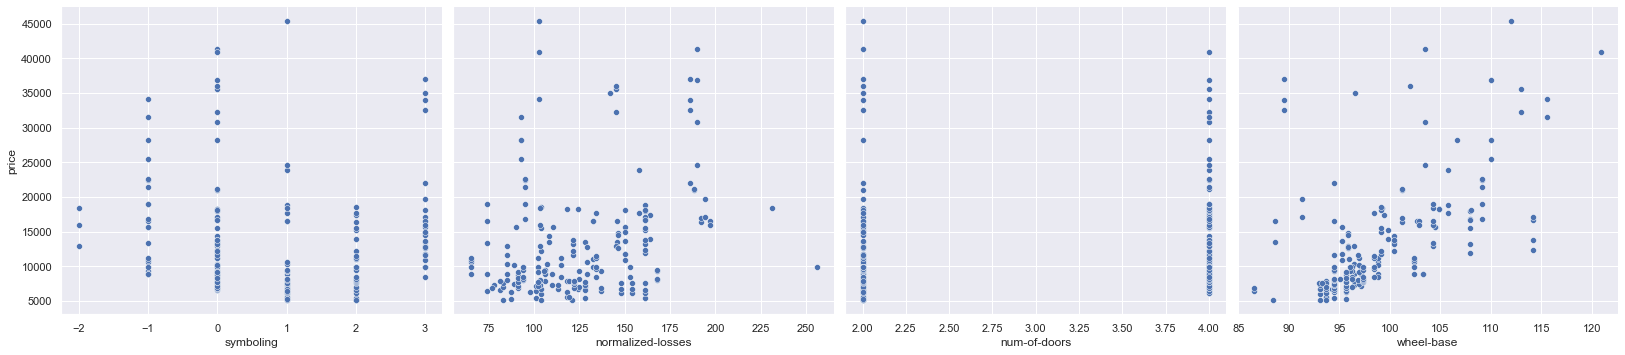

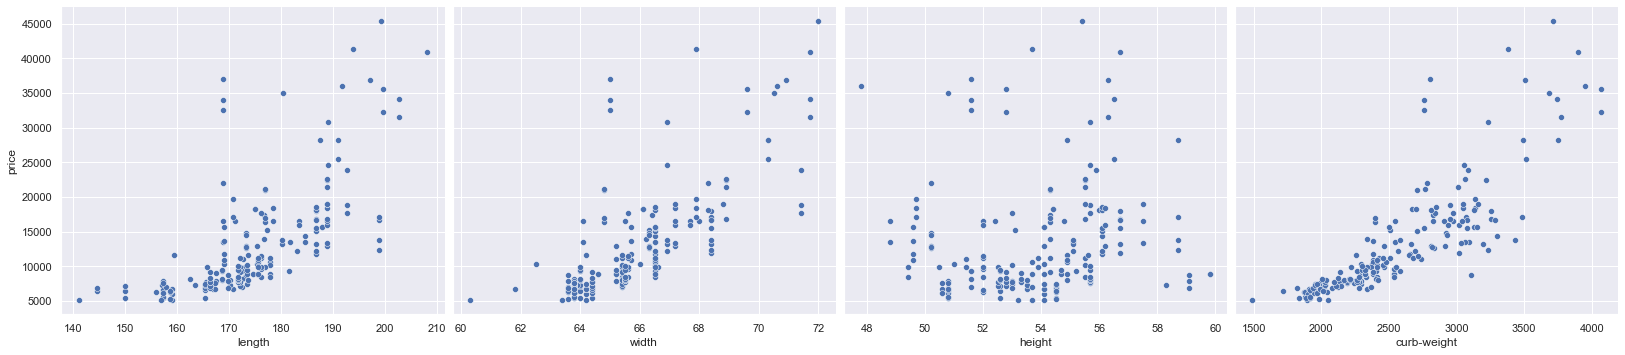

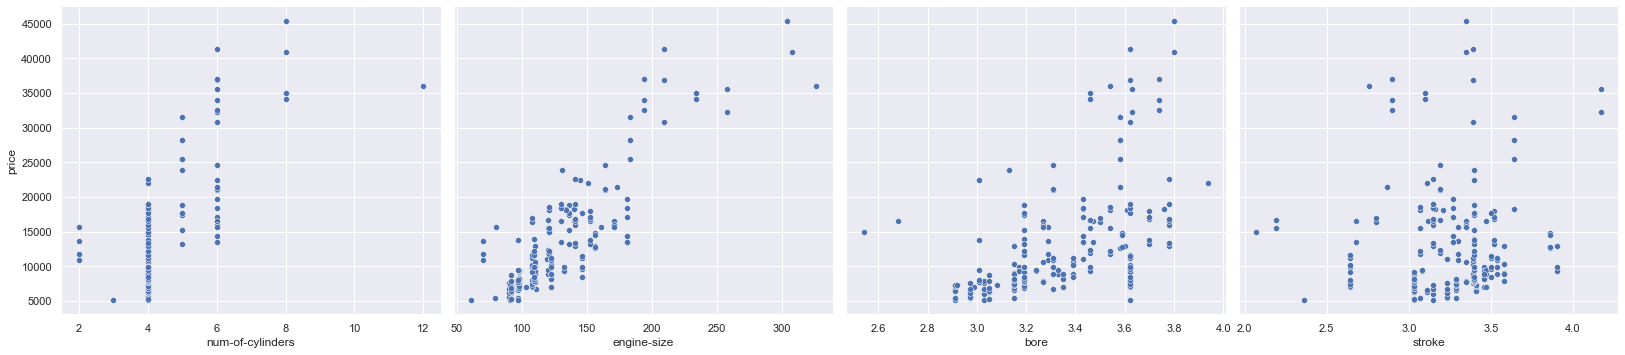

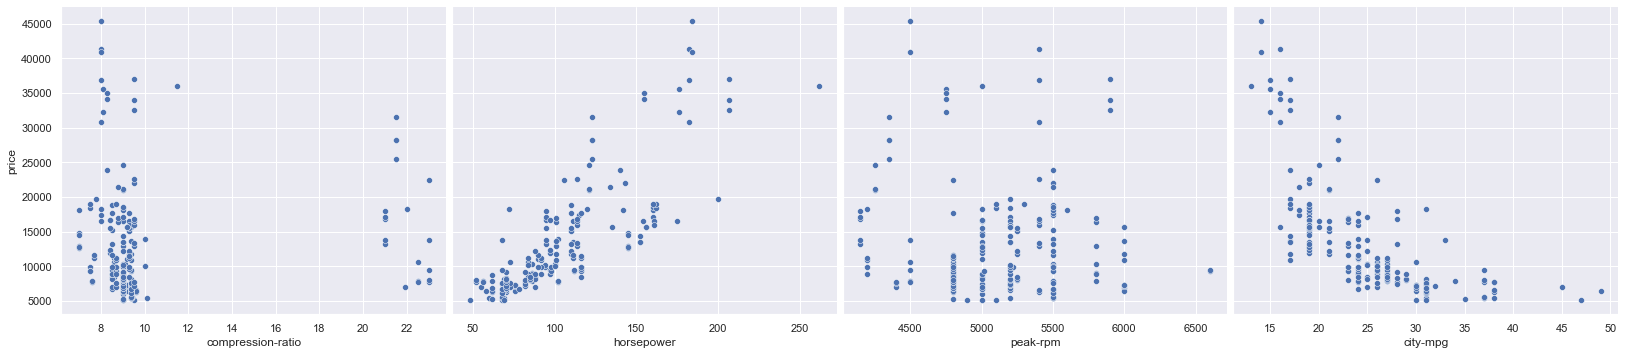

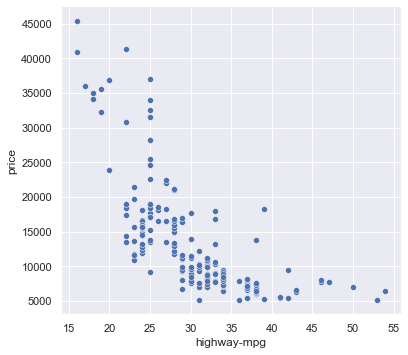

In [148]:
sns.set_theme(style="darkgrid")

plt1 = sns.pairplot(
    cars,
    x_vars=['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base'],
    y_vars=["price"],
    height=5,
    aspect=1.15,
)

plt2 = sns.pairplot(
    cars,
    x_vars=['length', 'width', 'height', 'curb-weight'],
    y_vars=["price"],
    height=5,
    aspect=1.15,
)

plt3 = sns.pairplot(
    cars,
    x_vars=['num-of-cylinders', 'engine-size', 'bore', 'stroke'],
    y_vars=["price"],
    height=5,
    aspect=1.15,
)

sns.set_theme(style="darkgrid")

plt4 = sns.pairplot(
    cars,
    x_vars=['compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg'],
    y_vars=["price"],
    height=5,
    aspect=1.15,
)

sns.set_theme(style="darkgrid")

plt5 = sns.pairplot(
    cars,
    x_vars=['highway-mpg'],
    y_vars=["price"],
    height=5,
    aspect=1.15,
)

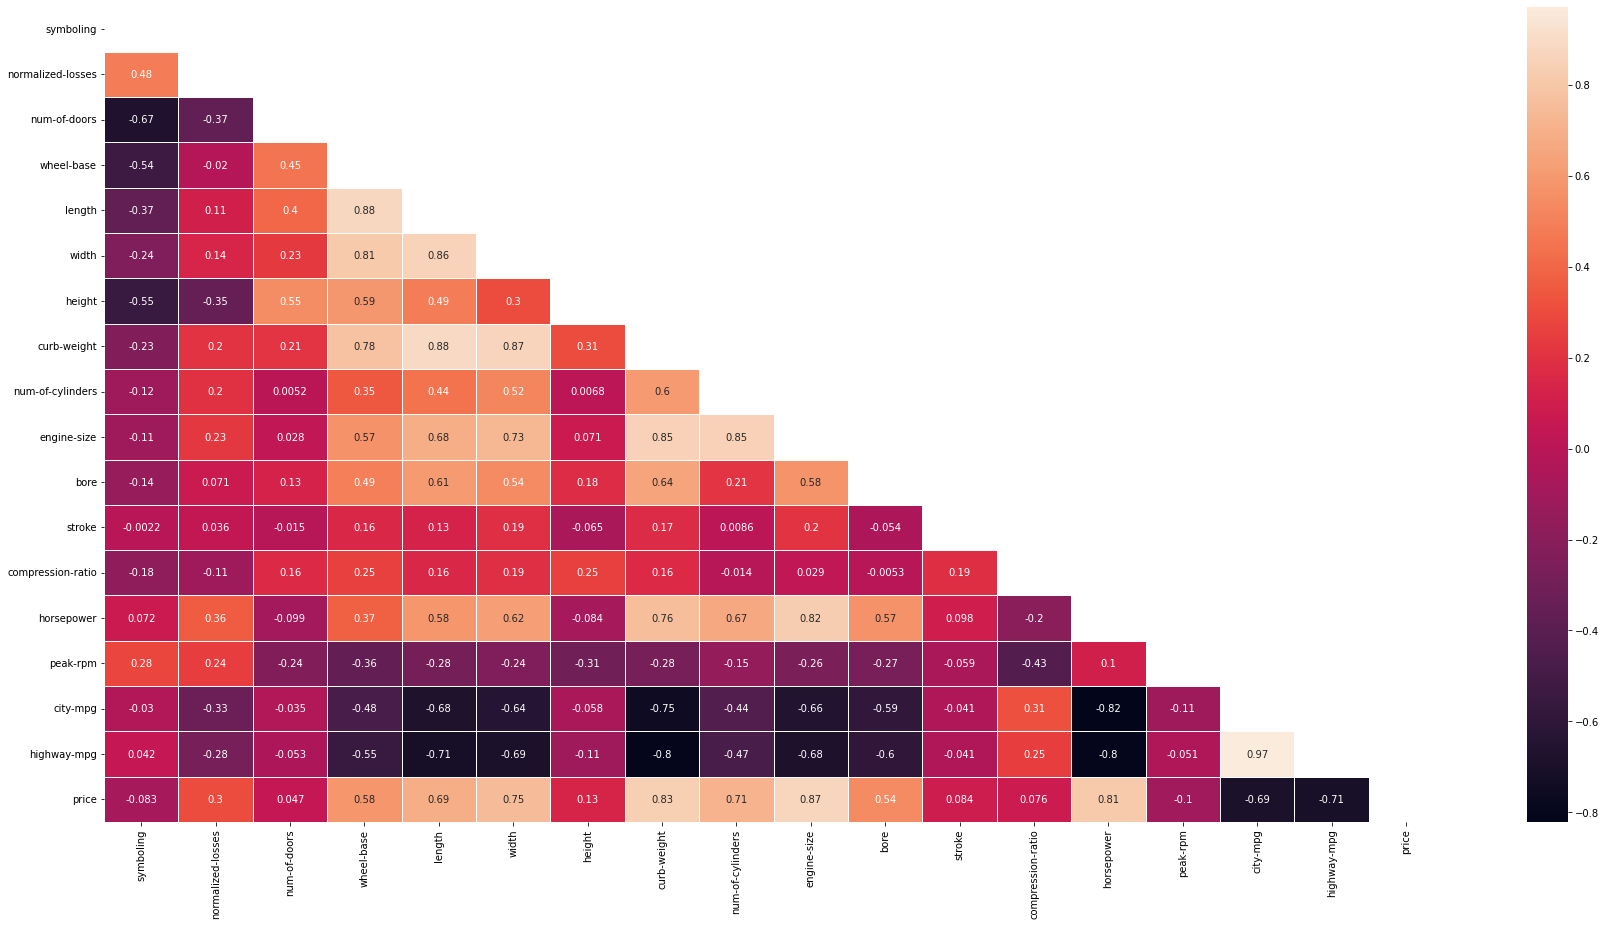

In [23]:
#view correlation coefficients for each varaibles against price
plt.figure(figsize=(30, 15))
correlationMatrix = cars.corr()
mask =np.zeros_like(correlationMatrix)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlationMatrix, annot =True, linewidth = .5, mask=mask)

In [27]:
#Saving updated CSV file
cars.to_csv(r'C:\Users\andre\Downloads\Car Prices\automobile2.csv', index=False)

In [28]:
#Re-importing data 
cars = pd.read_csv(r'C:\Users\andre\Downloads\Car Prices\automobile2.csv')

In [29]:
#Re-assigning columns that are continuous and categorical 
con = cars.select_dtypes(include=['float64','int64']).columns
cat = cars.select_dtypes(include=['object']).columns

In [30]:
cat

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

In [31]:
#Making dummy variables
make_dummies = pd.get_dummies(cars['make'])
fuel_dummies = pd.get_dummies(cars['fuel-type'])
asp_dummies = pd.get_dummies(cars['aspiration'])
style_dummies = pd.get_dummies(cars['body-style'])
wheels_dummies = pd.get_dummies(cars['drive-wheels'])
eng_loc_dummies = pd.get_dummies(cars['engine-location'])
eng_type_dummies = pd.get_dummies(cars['engine-type'])
fuel_sys_dummies = pd.get_dummies(cars['fuel-system'])

In [32]:
#Remove the first column in each group of dummy variables, k-1
make_dummies = make_dummies.drop(make_dummies.columns[1], axis=1)
fuel_dummies = fuel_dummies.drop(fuel_dummies.columns[1], axis=1)
asp_dummies = asp_dummies.drop(asp_dummies.columns[1], axis=1)
style_dummies = style_dummies.drop(style_dummies.columns[1], axis=1)
wheels_dummies = wheels_dummies.drop(wheels_dummies.columns[1], axis=1)
eng_loc_dummies = eng_loc_dummies.drop(eng_loc_dummies.columns[1], axis=1)
eng_type_dummies = eng_type_dummies.drop(eng_type_dummies.columns[1], axis=1)
fuel_sys_dummies = fuel_sys_dummies.drop(fuel_sys_dummies.columns[1], axis=1)

In [33]:
#Merge dummies into the cars dataset
cars = pd.concat([cars, make_dummies], axis=1)
cars = pd.concat([cars, fuel_dummies], axis=1)
cars = pd.concat([cars, asp_dummies], axis=1)
cars = pd.concat([cars, style_dummies], axis=1)
cars = pd.concat([cars, wheels_dummies], axis=1)
cars = pd.concat([cars, eng_loc_dummies], axis=1)
cars = pd.concat([cars, eng_type_dummies], axis=1)
cars = pd.concat([cars, fuel_sys_dummies], axis=1)

In [34]:
cat

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

In [35]:
#Drop cat variables that were replaced by dummy variables
cars = cars.drop(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'], axis=1)

In [36]:
cars

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,ohcf,ohcv,rotor,1bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,145.812500,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,3,145.812500,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,1,132.696875,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,0,0,0,1,0,0
3,2,164.000000,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,2,164.000000,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,95.000000,4,109.1,188.8,68.9,55.5,2952,4,141,...,0,0,0,0,0,0,0,1,0,0
195,-1,95.000000,4,109.1,188.8,68.8,55.5,3049,4,141,...,0,0,0,0,0,0,0,1,0,0
196,-1,95.000000,4,109.1,188.8,68.9,55.5,3012,6,173,...,0,1,0,0,0,0,0,1,0,0
197,-1,95.000000,4,109.1,188.8,68.9,55.5,3217,6,145,...,0,0,0,0,0,1,0,0,0,0


In [37]:
#Saving updated CSV file
cars.to_csv(r'C:\Users\andre\Downloads\Car Prices\automobile3.csv', index=False)

# Linear Regression

In [90]:
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [39]:
#Re-importing data 
cars = pd.read_csv(r'C:\Users\andre\Downloads\Car Prices\automobile3.csv')

In [40]:
#dropping uneeded variable and the target variable
X = cars.drop(["price"], axis=1)

#keeping only the target variable 
y = cars["price"]

X.shape, y.shape

((199, 59), (199,))

In [41]:
# Create linear regression object
reg = LinearRegression()

In [42]:
#R^2 score based on a random split
count = 0
for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    reg.fit(X_train, y_train)
    count = count + reg.score(X_test, y_test)
print(count/1000)

0.8315490424942048


In [43]:
y_pred = reg.predict(X_test)

In [44]:
#The intercept
intercept=reg.intercept_
print('Intercept: %.2f'
      % reg.intercept_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

#Root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))


Intercept: 10035.62
Mean squared error: 18771550.40
Root Mean squared error: 4332.61


In [45]:
coef = reg.coef_

In [46]:
print("y = ",intercept," + ",end="")

for i in range(0, len(coef)):
    print(coef[i], " X",i," + ", end="")
    
print(" E")

y =  10035.623651015158  + -77.80868977632163  X 0  + 13.080156723253806  X 1  + 397.8013092622039  X 2  + 173.35481049298622  X 3  + -127.93257251801627  X 4  + 617.8986106142655  X 5  + -238.06698389536436  X 6  + 6.783561781482126  X 7  + -2649.041784005516  X 8  + 115.32068522709345  X 9  + -10264.991003414783  X 10  + -2032.4679757387369  X 11  + -106.0367346721664  X 12  + 10.523379852864764  X 13  + 0.7872308877545038  X 14  + -133.94400752615047  X 15  + 123.91619180770044  X 16  + -1412.2684807703731  X 17  + 5694.080832278168  X 18  + 1489.6433259606874  X 19  + -3942.902304725705  X 20  + -952.3452761197868  X 21  + -2821.7787350833605  X 22  + 1049.3229538520366  X 23  + -699.1909062450102  X 24  + 2019.4703480344324  X 25  + -1755.1181494270434  X 26  + -4773.709357206967  X 27  + -560.3672133268544  X 28  + -4331.974761591686  X 29  + -4795.7956182550615  X 30  + 6630.816242676512  X 31  + -2192.746968923712  X 32  + 3934.196937114924  X 33  + -2411.548260068416  X 34  + 

In [47]:
#table of coefficients
feat = pd.DataFrame(coef, X.columns, columns = ["coefficient"])
feat.coefficient = feat.coefficient.abs()
feat[0:10]

,coefficient
symboling,77.808690
normalized-losses,13.080157
num-of-doors,397.801309
wheel-base,173.354810
length,127.932573
width,617.898611
height,238.066984
curb-weight,6.783562
num-of-cylinders,2649.041784
engine-size,115.320685


In [48]:
#standard deviations for each variable
stdevs = []

for i in X.columns:
    stdev = cars[i].std()
    stdevs.append(stdev)

In [49]:
#variable importance
feat["std"] = np.array(stdevs).reshape(-1, 1)
feat["importance (t-value)"] = feat["std"]*feat["coefficient"]
feat[0:10]

,coefficient,std,importance (t-value)
symboling,77.808690,1.259651,98.011820
normalized-losses,13.080157,35.300816,461.740208
num-of-doors,397.801309,0.993252,395.116820
wheel-base,173.354810,6.086103,1055.055203
length,127.932573,12.323033,1576.517313
width,617.898611,2.106373,1301.524735
height,238.066984,2.446730,582.485523
curb-weight,6.783562,519.189151,3521.951682
num-of-cylinders,2649.041784,1.064157,2818.995991
engine-size,115.320685,41.703898,4809.322104


# Optimization

In [50]:
#Filter out certain columns 
#Normalize data
#Check for normal distribution for cat vars

#Re-importing data 
cars = pd.read_csv(r'C:\Users\andre\Downloads\Car Prices\automobile3.csv')

In [51]:
#Correlations with price
correlations = cars.corr()
correlations = correlations['price'].sort_values(axis=0, ascending=True)
correlations = pd.DataFrame(correlations)
correlations[0:10]

,price
highway-mpg,-0.708139
city-mpg,-0.690262
ohc,-0.331074
front,-0.330899
hatchback,-0.297412
std,-0.187620
toyota,-0.184639
1bbl,-0.172857
honda,-0.168023
subaru,-0.149649


In [52]:
#List of variables with low correlations
low_neg = correlations[(correlations['price'] > -0.15) & (correlations['price'] <= 0)]

for row in low_neg.index:
    print("'",row,"',", end = " ")

' subaru ', ' dodge ', ' mitsubishi ', ' plymouth ', ' chevrolet ', ' nissan ', ' peak-rpm ', ' volkswagen ', ' mazda ', ' symboling ', ' 4wd ', ' spdi ', ' isuzu ', ' renault ', ' wagon ', ' spfi ', ' 4bbl ', ' rotor ', ' mfi ', 

In [53]:
#List of variables with low correlations
low_pos = correlations[(correlations['price'] < 0.15) & (correlations['price'] >= 0)]

for row in low_pos.index:
    print("'",row,"',", end = " ")

' ohcf ', ' mercury ', ' alfa-romero ', ' saab ', ' num-of-doors ', ' peugot ', ' compression-ratio ', ' stroke ', ' idi ', ' diesel ', ' height ', ' volvo ', 

In [54]:
cars = cars.drop(['subaru', 'dodge','mitsubishi', 'plymouth', 'chevrolet', 'nissan', 'peak-rpm', 
                  'volkswagen', 'mazda', 'symboling', '4wd', 'spdi', 'isuzu', 'renault', 'wagon', 'spfi', 
                  '4bbl', 'rotor', 'mfi','ohcf', 'mercury', 'alfa-romero', 'saab', 'num-of-doors', 
                  'peugot', 'compression-ratio', 'stroke', 'idi', 'diesel', 'height', 'volvo'], 
                axis=1)

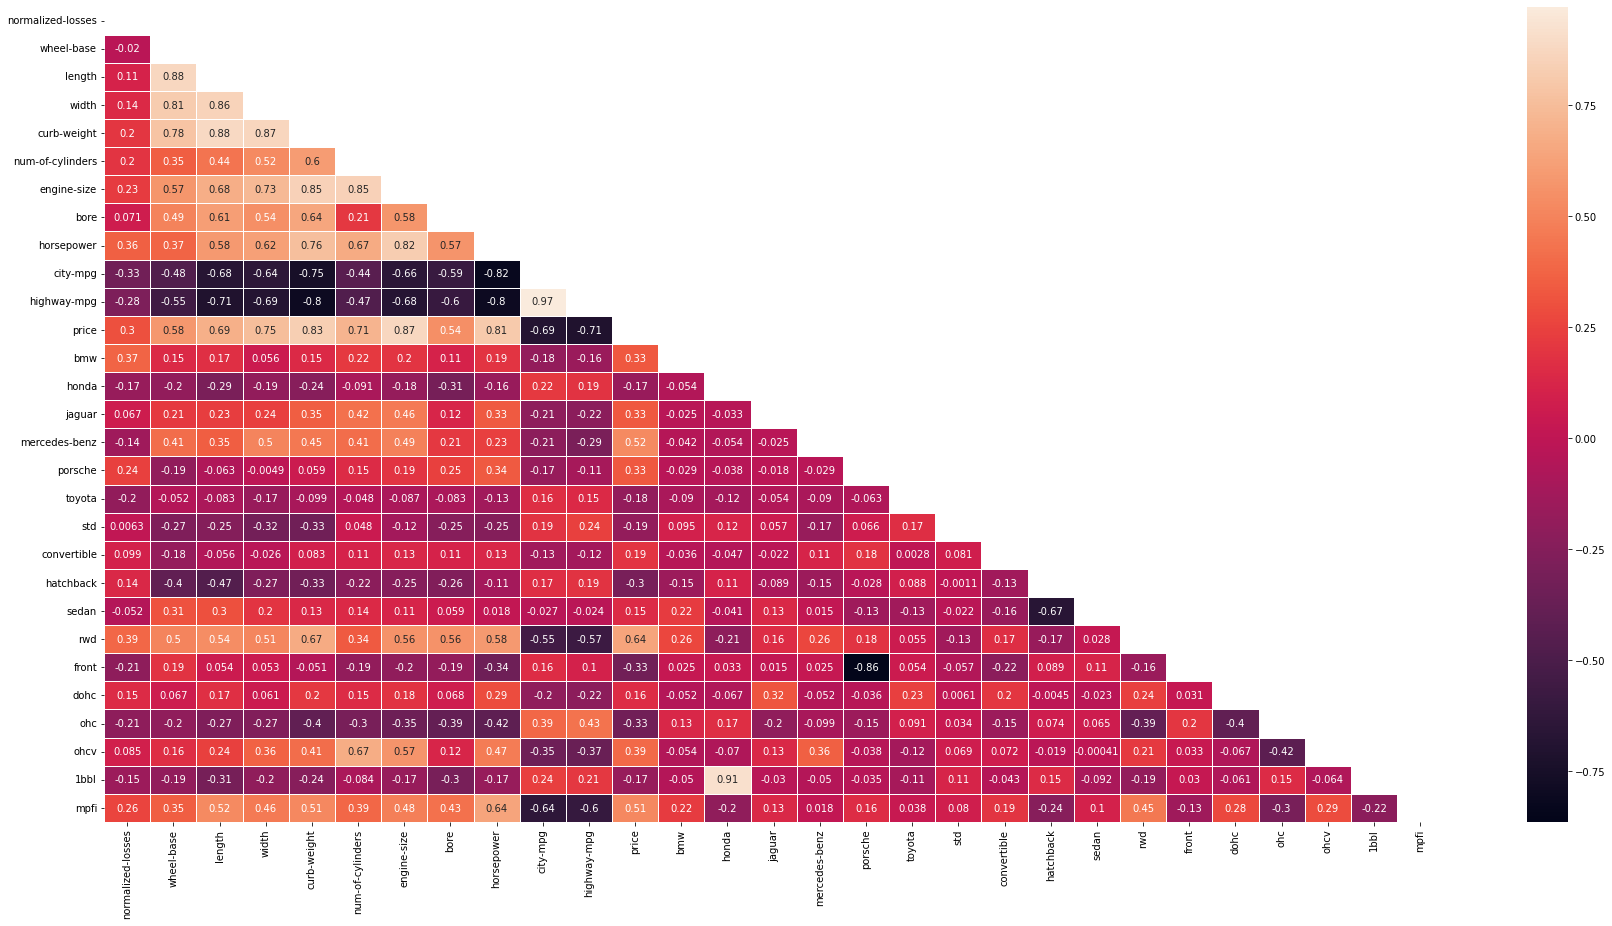

In [53]:
#view correlation coefficients for each varaibles against price - focusing on collinearity 
plt.figure(figsize=(30, 15))
correlationMatrix = cars.corr()
mask =np.zeros_like(correlationMatrix)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlationMatrix, annot =True, linewidth = .5, mask=mask)

In [55]:
#Combine city-mpg and highway mpg into an avg due to high collinearity
cars["avg-mpg"] = ((cars["city-mpg"] + cars["highway-mpg"]) / 2)

In [56]:
#Remove city mpg and highway mpg columns
cars = cars.drop(["city-mpg", "highway-mpg"], axis=1)

In [57]:
cars["avg-mpg"]

0      24.0
1      24.0
2      22.5
3      27.0
4      20.0
       ... 
194    25.5
195    22.0
196    20.5
197    26.5
198    22.0
Name: avg-mpg, Length: 199, dtype: float64

In [58]:
#Remove honda/1bbl, keep honda/1bbl
#Remove porshe/front, keep porshe/front

#Remove length, width, keep curb weight
#Remove horsepower, num-of-cylinders, keep engine size

cars = cars.drop(["length", "width", "horsepower", "num-of-cylinders", "1bbl", "front"], axis=1)

In [59]:
cars.columns

Index(['normalized-losses', 'wheel-base', 'curb-weight', 'engine-size', 'bore',
       'price', 'bmw', 'honda', 'jaguar', 'mercedes-benz', 'porsche', 'toyota',
       'std', 'convertible', 'hatchback', 'sedan', 'rwd', 'dohc', 'ohc',
       'ohcv', 'mpfi', 'avg-mpg'],
      dtype='object')

In [60]:
#Separating continuous and dummy variables for normalization 
con = cars[["normalized-losses", "wheel-base", "curb-weight", "engine-size", "bore", "avg-mpg"]]

dum = cars[['bmw', 'honda', 'jaguar', 'mercedes-benz', 'porsche', 'toyota',
       'std', 'convertible', 'hatchback', 'sedan', 'rwd', 'dohc',
       'ohc', 'ohcv', 'mpfi']]

y = cars["price"]

con.shape, dum.shape, y.shape

((199, 6), (199, 15), (199,))

In [61]:
#Normalizing the data
scaler = preprocessing.MinMaxScaler()
names = con.columns
d = scaler.fit_transform(con)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,normalized-losses,wheel-base,curb-weight,engine-size,bore,avg-mpg
0,0.423102,0.058309,0.411171,0.260377,0.664286,0.246575
1,0.423102,0.058309,0.411171,0.260377,0.664286,0.246575
2,0.354434,0.230321,0.517843,0.343396,0.100000,0.205479
3,0.518325,0.384840,0.329325,0.181132,0.464286,0.328767
4,0.518325,0.373178,0.518231,0.283019,0.464286,0.136986


In [62]:
#Combining data
vars_scaled = pd.concat([scaled_df, dum], axis=1)
cars_scaled = pd.concat([vars_scaled, y], axis=1)
cars_scaled.shape

(199, 22)

In [63]:
cars_scaled

,normalized-losses,wheel-base,curb-weight,engine-size,bore,avg-mpg,bmw,honda,jaguar,mercedes-benz,...,std,convertible,hatchback,sedan,rwd,dohc,ohc,ohcv,mpfi,price
0,0.423102,0.058309,0.411171,0.260377,0.664286,0.246575,0,0,0,0,...,1,1,0,0,1,1,0,0,1,13495
1,0.423102,0.058309,0.411171,0.260377,0.664286,0.246575,0,0,0,0,...,1,1,0,0,1,1,0,0,1,16500
2,0.354434,0.230321,0.517843,0.343396,0.100000,0.205479,0,0,0,0,...,1,0,1,0,1,0,0,1,1,16500
3,0.518325,0.384840,0.329325,0.181132,0.464286,0.328767,0,0,0,0,...,1,0,0,1,0,0,1,0,1,13950
4,0.518325,0.373178,0.518231,0.283019,0.464286,0.136986,0,0,0,0,...,1,0,0,1,0,0,1,0,1,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.157068,0.655977,0.567882,0.301887,0.885714,0.287671,0,0,0,0,...,1,0,0,1,1,0,1,0,1,16845
195,0.157068,0.655977,0.605508,0.301887,0.885714,0.191781,0,0,0,0,...,0,0,0,1,1,0,1,0,1,19045
196,0.157068,0.655977,0.591156,0.422642,0.742857,0.150685,0,0,0,0,...,1,0,0,1,1,0,0,1,1,21485
197,0.157068,0.655977,0.670675,0.316981,0.335714,0.315068,0,0,0,0,...,0,0,0,1,1,0,1,0,0,22470


In [64]:
con_scaled = cars_scaled[["normalized-losses", "wheel-base", "curb-weight", "engine-size", "bore", "avg-mpg", "price"]]

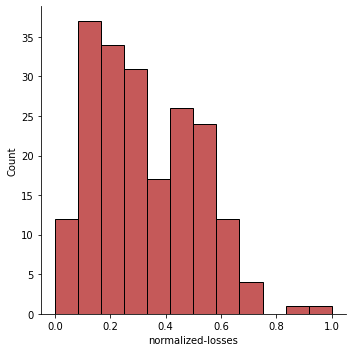

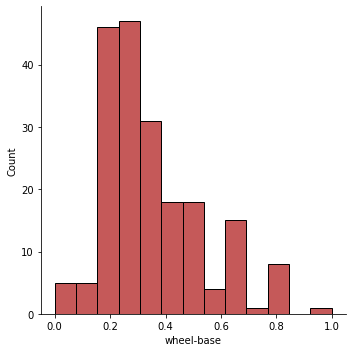

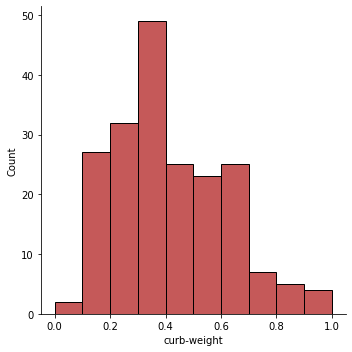

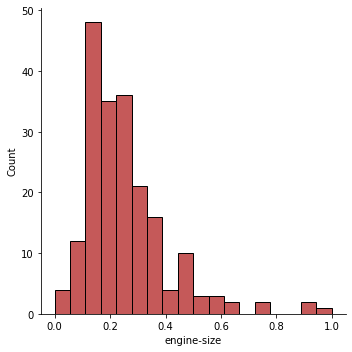

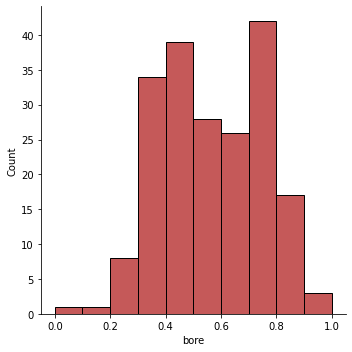

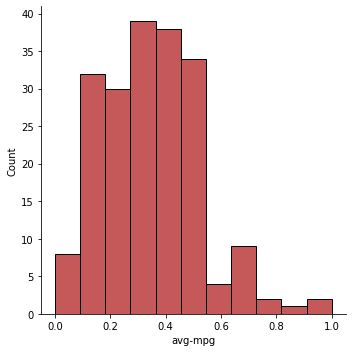

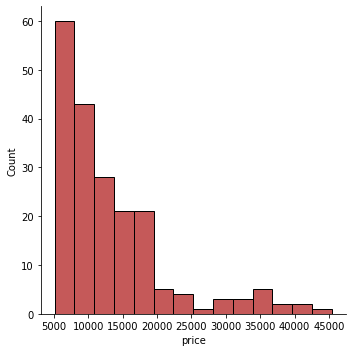

In [305]:
#Check for normal distribution for continuous variables
for column in con_scaled.columns:
    sns.displot(con_scaled[column], color='firebrick');

In [65]:
#Take log transformations to assure normal distribution 
cars_scaled["normalized-losses"] = np.sqrt(cars_scaled["normalized-losses"])
cars_scaled["wheel-base"] = np.sqrt(cars_scaled["wheel-base"])
cars_scaled["avg-mpg"] = np.sqrt(cars_scaled["avg-mpg"])
cars_scaled["price"] = np.log(cars_scaled["price"])

In [66]:
con_scaled = cars_scaled[["normalized-losses", "wheel-base", "curb-weight", "engine-size", "bore", "avg-mpg", "price"]]

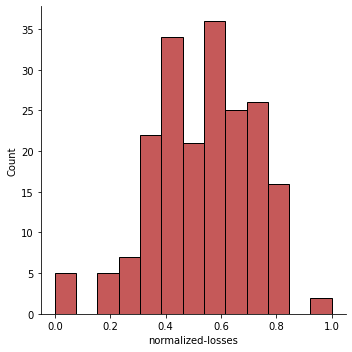

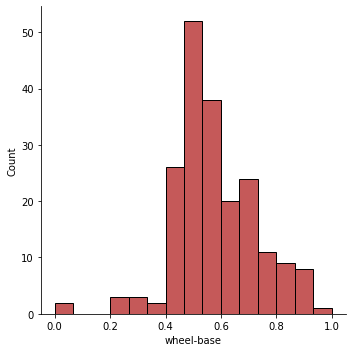

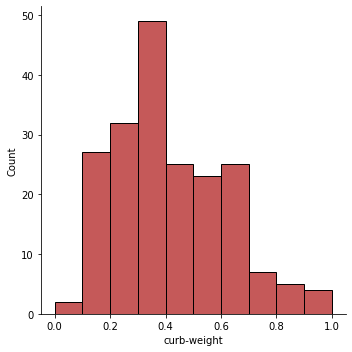

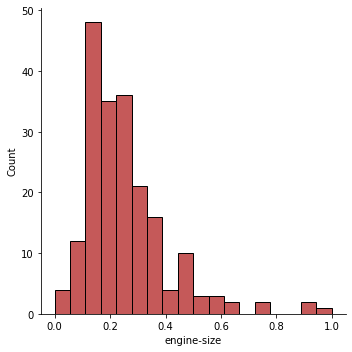

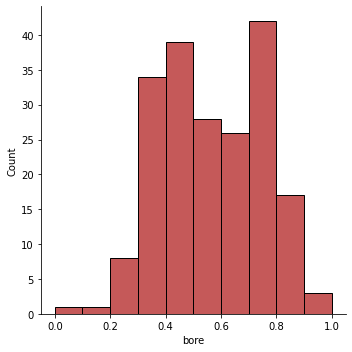

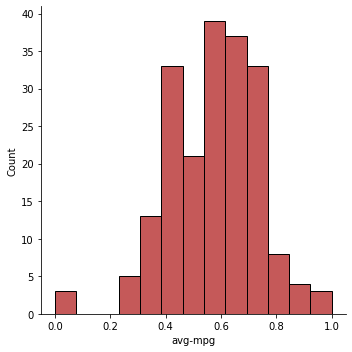

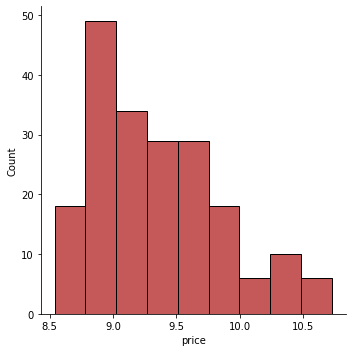

In [308]:
#Check for normal distribution for continuous variables
for column in con_scaled.columns:
    sns.displot(con_scaled[column], color='firebrick');

In [67]:
cars_scaled

,normalized-losses,wheel-base,curb-weight,engine-size,bore,avg-mpg,bmw,honda,jaguar,mercedes-benz,...,std,convertible,hatchback,sedan,rwd,dohc,ohc,ohcv,mpfi,price
0,0.650463,0.241473,0.411171,0.260377,0.664286,0.496564,0,0,0,0,...,1,1,0,0,1,1,0,0,1,9.510075
1,0.650463,0.241473,0.411171,0.260377,0.664286,0.496564,0,0,0,0,...,1,1,0,0,1,1,0,0,1,9.711116
2,0.595344,0.479917,0.517843,0.343396,0.100000,0.453298,0,0,0,0,...,1,0,1,0,1,0,0,1,1,9.711116
3,0.719948,0.620354,0.329325,0.181132,0.464286,0.573382,0,0,0,0,...,1,0,0,1,0,0,1,0,1,9.543235
4,0.719948,0.610883,0.518231,0.283019,0.464286,0.370117,0,0,0,0,...,1,0,0,1,0,0,1,0,1,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.396318,0.809924,0.567882,0.301887,0.885714,0.536350,0,0,0,0,...,1,0,0,1,1,0,1,0,1,9.731809
195,0.396318,0.809924,0.605508,0.301887,0.885714,0.437928,0,0,0,0,...,0,0,0,1,1,0,1,0,1,9.854560
196,0.396318,0.809924,0.591156,0.422642,0.742857,0.388182,0,0,0,0,...,1,0,0,1,1,0,0,1,1,9.975110
197,0.396318,0.809924,0.670675,0.316981,0.335714,0.561310,0,0,0,0,...,0,0,0,1,1,0,1,0,0,10.019936


In [68]:
#Saving updated CSV file
cars_scaled.to_csv(r'C:\Users\andre\Downloads\Car Prices\automobile4.csv', index=False)

# Linear Regression

In [69]:
#Re-importing data 
cars = pd.read_csv(r'C:\Users\andre\Downloads\Car Prices\automobile4.csv')

#dropping uneeded variable and the target variable
X = cars.drop(["price"], axis=1)

#keeping only the target variable 
y = cars["price"]

X.shape, y.shape

((199, 21), (199,))

In [70]:
X

,normalized-losses,wheel-base,curb-weight,engine-size,bore,avg-mpg,bmw,honda,jaguar,mercedes-benz,...,toyota,std,convertible,hatchback,sedan,rwd,dohc,ohc,ohcv,mpfi
0,0.650463,0.241473,0.411171,0.260377,0.664286,0.496564,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
1,0.650463,0.241473,0.411171,0.260377,0.664286,0.496564,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
2,0.595344,0.479917,0.517843,0.343396,0.100000,0.453298,0,0,0,0,...,0,1,0,1,0,1,0,0,1,1
3,0.719948,0.620354,0.329325,0.181132,0.464286,0.573382,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
4,0.719948,0.610883,0.518231,0.283019,0.464286,0.370117,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.396318,0.809924,0.567882,0.301887,0.885714,0.536350,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1
195,0.396318,0.809924,0.605508,0.301887,0.885714,0.437928,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
196,0.396318,0.809924,0.591156,0.422642,0.742857,0.388182,0,0,0,0,...,0,1,0,0,1,1,0,0,1,1
197,0.396318,0.809924,0.670675,0.316981,0.335714,0.561310,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [71]:
# Create linear regression object
reg = LinearRegression()

In [72]:
#R^2 score based on a random split
count = 0
for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    reg.fit(X_train, y_train)
    count = count + reg.score(X_test, y_test)
print(count/1000)

0.9210868352132904


# Ridge Regression

In [96]:
#Use Ridge Regression for final regression model
#Works best when number of predictor variables and the number of observations are closer in value
#Dataset has lower observation count, which may mean better performace using ridge regression 

reg = linear_model.Ridge(alpha=.01)

In [97]:
#R^2 score based on a random split
count = 0
for i in range(0, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    reg.fit(X_train, y_train)
    count = count + reg.score(X_test, y_test)
print(count/1000)

0.9265481958291261


In [98]:
y_pred = reg.predict(X_test)

In [99]:
#The intercept
intercept=reg.intercept_
print('Intercept: %.2f'
      % reg.intercept_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

#Root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred, squared=False))

Intercept: 8.77
Mean squared error: 0.02
Root Mean squared error: 0.16


In [100]:
coef = reg.coef_

In [101]:
print("y = ",intercept," + ",end="")

for i in range(0, len(coef)):
    print(coef[i], " X",i," + ", end="")
    
print(" E")

y =  8.771565142164205  + -0.001042226515708229  X 0  + 0.029993075292856317  X 1  + 1.6662648529466921  X 2  + -0.44781457470561015  X 3  + -0.03315241116647386  X 4  + -0.42467344585245154  X 5  + 0.4123696910412718  X 6  + 0.052433132348108875  X 7  + 0.055371554450973956  X 8  + 0.29807982865917326  X 9  + 1.1111565783866522  X 10  + -0.08201516312476043  X 11  + -0.09016784723655302  X 12  + 0.28343761198270206  X 13  + 0.0942204572493309  X 14  + 0.13635156837123508  X 15  + 0.047906295476887524  X 16  + 0.13871772120538345  X 17  + 0.10600106900018498  X 18  + 0.08198078583310203  X 19  + 0.1361831310200071  X 20  +  E


In [102]:
#table of coefficients
feat = pd.DataFrame(coef, X.columns, columns = ["coefficient"])
feat.coefficient = feat.coefficient.abs()
feat[0:10]

,coefficient
normalized-losses,0.001042
wheel-base,0.029993
curb-weight,1.666265
engine-size,0.447815
bore,0.033152
avg-mpg,0.424673
bmw,0.412370
honda,0.052433
jaguar,0.055372
mercedes-benz,0.298080


In [103]:
#standard deviations for each variable
stdevs = []

for i in X.columns:
    stdev = cars[i].std()
    stdevs.append(stdev)

In [104]:
#variable importance
feat["std"] = np.array(stdevs).reshape(-1, 1)
feat["importance (t-value)"] = feat["std"]*feat["coefficient"]
feat

,coefficient,std,importance (t-value)
normalized-losses,0.001042,0.180162,0.000188
wheel-base,0.029993,0.150875,0.004525
curb-weight,1.666265,0.201392,0.335573
engine-size,0.447815,0.157373,0.070474
bore,0.033152,0.191866,0.006361
avg-mpg,0.424673,0.163760,0.069544
bmw,0.412370,0.196926,0.081206
honda,0.052433,0.247725,0.012989
jaguar,0.055372,0.122160,0.006764
mercedes-benz,0.298080,0.196926,0.058700


<BarContainer object of 21 artists>

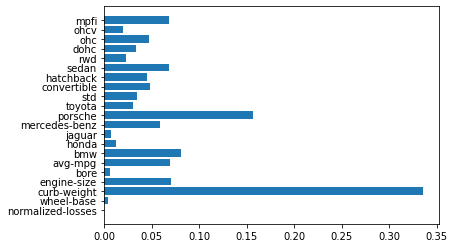

In [105]:
plt.barh(feat.index, feat["importance (t-value)"])

In [106]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred, 
                       '% Difference': (y_test-y_pred)/y_pred })
pred_df.shape

(60, 4)

In [107]:
pred_df[0:10]

,Actual Value,Predicted Value,Difference,% Difference
82,9.135509,9.284589,-0.149080,-0.016057
15,10.628981,10.347035,0.281946,0.027249
111,9.795345,9.660875,0.134470,0.013919
177,8.984067,9.168879,-0.184813,-0.020157
76,9.047704,9.059253,-0.011549,-0.001275
163,9.209240,9.275005,-0.065765,-0.007091
68,10.620351,10.523167,0.097185,0.009235
67,10.464702,10.550986,-0.086284,-0.008178
120,9.999616,10.640151,-0.640535,-0.060200
173,9.680219,9.641444,0.038775,0.004022


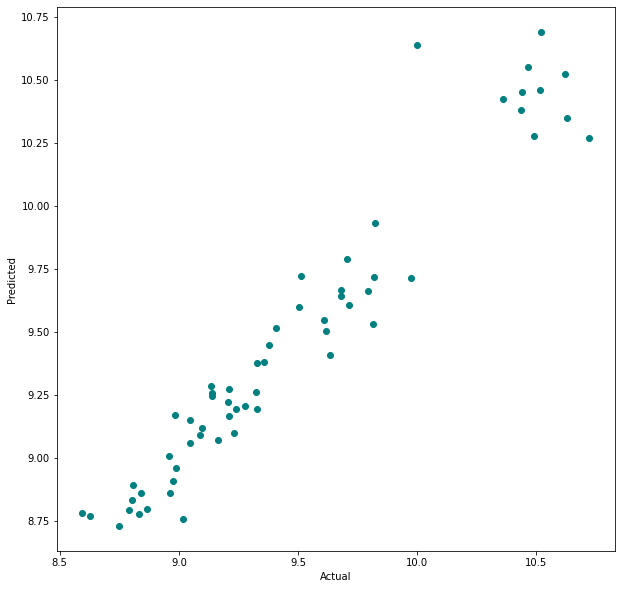

In [108]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.show()